In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [140]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [141]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
train_data.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [143]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [144]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [145]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [146]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",male,347082,G6,S
freq,1,577,7,4,644


In [147]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [148]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [149]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending = True)

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


In [150]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending = True)

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


In [151]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [152]:
train_data[['Name', 'Survived']].groupby(['Name'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Name,Survived
559,"Moss, Mr. Albert Johan",1
472,"Lemore, Mrs. (Amelia Milley)",1
259,"Fortune, Miss. Mabel Helen",1
258,"Fortune, Miss. Alice Elizabeth",1
742,"Silven, Miss. Lyyli Karoliina",1
...,...,...
380,"Hoyt, Mr. William Fisher",0
382,"Humblen, Mr. Adolf Mathias Nicolai Olsen",0
383,"Hunt, Mr. George Henry",0
384,"Ibrahim Shawah, Mr. Yousseff",0


In [153]:
preprocessing_train_data = pd.read_csv('train.csv')
preprocessing_test_data = pd.read_csv('test.csv')

preprocessing_train_data['FamilySize'] = preprocessing_train_data['SibSp'] + preprocessing_train_data['Parch']
preprocessing_test_data['FamilySize'] = preprocessing_test_data['SibSp'] + preprocessing_test_data['Parch']

preprocessing_train_data.drop(['SibSp', 'Parch'], axis = 1, inplace=True)
preprocessing_test_data.drop(['SibSp', 'Parch'], axis = 1, inplace=True)

preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [154]:
preprocessing_train_data[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending = True)

,Survived
FamilySize,
7,0.000000
10,0.000000
5,0.136364
4,0.200000
0,0.303538
6,0.333333
1,0.552795
2,0.578431
3,0.724138


In [155]:
preprocessing_train_data.loc[preprocessing_train_data['FamilySize'] <= 4, 'FamilySize'] = 0
preprocessing_train_data.loc[preprocessing_train_data['FamilySize'] > 4, 'FamilySize'] = 1

preprocessing_test_data.loc[preprocessing_test_data['FamilySize'] <= 4, 'FamilySize'] = 0
preprocessing_test_data.loc[preprocessing_test_data['FamilySize'] > 4, 'FamilySize'] = 1

preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [156]:
preprocessing_train_data[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending = False)

,Survived
FamilySize,
0,0.396919
1,0.148936


In [157]:
preprocessing_train_data['Title'] = preprocessing_train_data.Name.str.extract('([A-Za-z]+)\.', expand=False)
preprocessing_test_data['Title'] = preprocessing_test_data.Name.str.extract('([A-Za-z]+)\.', expand=False)

preprocessing_train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
preprocessing_test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

pd.crosstab(preprocessing_train_data['Title'], preprocessing_test_data['Sex'])

Sex,female,male
Title,,
Don,0,1
Dr,0,3
Master,9,14
Miss,37,64
Mme,0,1
Mr,83,145
Mrs,21,37
Rev,2,1


In [158]:
preprocessing_train_data['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare',inplace=True)
preprocessing_test_data['Title'].replace(['Lady','Countess','Capt','Col','Don', 'Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare',inplace=True)

preprocessing_train_data['Title'].replace(['Ms','Mlle','Mme'], 'Miss', inplace=True)
preprocessing_test_data['Title'].replace(['Ms','Mlle','Mme'], ['Miss','Miss','Miss'], inplace=True)

preprocessing_train_data['Title'].replace(['Mr', 'Miss','Mrs','Master','Rare'],[1,2,3,4,5],inplace=True)
preprocessing_test_data['Title'].replace(['Mr', 'Miss','Mrs','Master','Rare'],[1,2,3,4,5],inplace=True)

In [159]:
preprocessing_train_data['Title'].replace([None],[0],inplace=True)
preprocessing_test_data['Title'].replace([None],[0],inplace=True)

preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,0,1
1,2,1,1,female,38.0,71.2833,C,0,3
2,3,1,3,female,26.0,7.9250,S,0,2
3,4,1,1,female,35.0,53.1000,S,0,3
4,5,0,3,male,35.0,8.0500,S,0,1


In [160]:
preprocessing_train_data['Age'].replace([None], [30], inplace=True)
preprocessing_test_data['Age'].replace([None], [30], inplace=True)

#DIY

In [161]:
# 1. Fill unknown "Embarked" to 'S'
# >> Which data do we want to edit?
# >> The unknown data is labeled as None, and we want to replace them with 'S'.
# (Hint: The code is almost same as the cell right above!!!)
preprocessing_train_data['Embarked'].replace([None],['S'],inplace=True)
preprocessing_test_data['Embarked'].replace([None],['S'],inplace=True)

In [162]:
# 2. "Embarked", "Sex" vectorization
# >> To apply Logistic regression or SVM,
#    we want to convert features that are in string format into numeric values.
# >> Let's replace 'female' --> 0, 'male' --> 1
preprocessing_train_data.replace(['female', 'male'], [0, 1], inplace=True)

In [163]:
# >> Now, replace 'Q' --> 0, 'C' --> 1, 'S' --> 2 in the same way!
preprocessing_train_data.replace(['Q', 'C','S'],[0,1,2],inplace=True)

In [164]:
# >> We also need to vectorize the test set.
# >> 'female' --> 0, 'male' --> 1
preprocessing_test_data.replace(['female','male'],[0,1],inplace=True)
# >> 'Q' --> 0, 'C' --> 1, 'S' --> 2
preprocessing_test_data.replace(['Q','C','S'],[0,1,2],inplace=True)

# Print top 5 values
preprocessing_train_data[['Sex', 'Embarked']].head()

,Sex,Embarked
0,1,2
1,0,1
2,0,2
3,0,2
4,1,2


In [165]:
# Print result
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,1,22.0,7.2500,2,0,1
1,2,1,1,0,38.0,71.2833,1,0,3
2,3,1,3,0,26.0,7.9250,2,0,2
3,4,1,1,0,35.0,53.1000,2,0,3
4,5,0,3,1,35.0,8.0500,2,0,1


# ML

In [166]:
preprocessing_train_data.head(60)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,1,22.0,7.2500,2,0,1
1,2,1,1,0,38.0,71.2833,1,0,3
2,3,1,3,0,26.0,7.9250,2,0,2
3,4,1,1,0,35.0,53.1000,2,0,3
4,5,0,3,1,35.0,8.0500,2,0,1
5,6,0,3,1,30.0,8.4583,0,0,1
6,7,0,1,1,54.0,51.8625,2,0,1
7,8,0,3,1,2.0,21.0750,2,0,4
8,9,1,3,0,27.0,11.1333,2,0,3
9,10,1,2,0,14.0,30.0708,1,0,3


In [167]:
preprocessing_train_data.tail(60)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
831,832,1,2,1,0.83,18.7500,2,0,4
832,833,0,3,1,30.00,7.2292,1,0,1
833,834,0,3,1,23.00,7.8542,2,0,1
834,835,0,3,1,18.00,8.3000,2,0,1
835,836,1,1,0,39.00,83.1583,1,0,2
836,837,0,3,1,21.00,8.6625,2,0,1
837,838,0,3,1,30.00,8.0500,2,0,1
838,839,1,3,1,32.00,56.4958,2,0,1
839,840,1,1,1,30.00,29.7000,1,0,1
840,841,0,3,1,20.00,7.9250,2,0,1


In [168]:
X_train = preprocessing_train_data.drop(['Survived','PassengerId'],axis=1)
Y_train = preprocessing_train_data["Survived"]
X_test = preprocessing_test_data.drop(['PassengerId'],axis=1)

Accuracy:  81.14
Area Under the Curve:  0.87


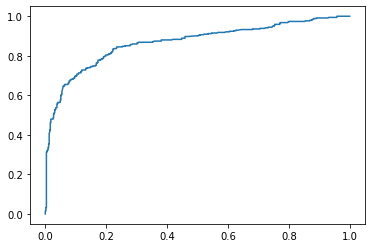

In [169]:
classifier = LogisticRegression()

classifier.fit(X_train, Y_train)

accuracy = classifier.score(X_train, Y_train)*100
Y_train_pred = classifier.predict_proba(X_train)[:,1]

FPR, TPR, thresholds = roc_curve(Y_train, Y_train_pred)
AUC = roc_auc_score(Y_train, Y_train_pred)

plt.plot(FPR, TPR)
print("Accuracy: ","{0:.2f}".format(accuracy))
print("Area Under the Curve: ", "{0:.2f}".format(AUC))

In [170]:
predict = classifier.predict(X_test)
predict = np.round(predict)

result = test_data.copy()
result["PREDICTION"] = predict
result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PREDICTION
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [171]:
result.head()
result.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PREDICTION
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


#DIY

Accuracy:  68.46
Area Under the Curve:  0.77


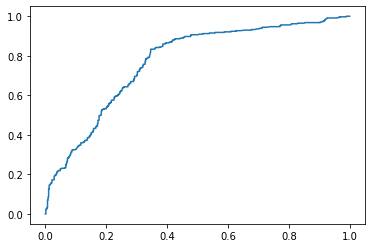

In [172]:
# 1. Create a SVM classifier from scikit-learn:
#    remember that we imported SVC from sklearn.svm!
# (Note: you need to set 'probability' argument to True)
classifier = SVC(probability=True)

# >> Train the classifier with the training set we preprocessed.
# >> Use fit() method.
classifier.fit(X_train, Y_train)

# >> Check the model accuracy on training set
# >> You can get the mean accuracy of a given dataset and labels
#    with score() method
accuracy = classifier.score(X_train, Y_train) * 100

# 2. Draw ROC curve on training set
# >> First, you need to compute probabilities of each labels for training set.
#    (which means you need to make *model predictions* for training set)
# >> You can do this with predict_proba() method
Y_train_pred = classifier.predict_proba(X_train)[:, 1]

# >> Calculate false positive rates, true positive rates,
#    and area under the curve (AUC) with
#    ground truth labels & predicted probability
FPR, TPR, thresholds = roc_curve(Y_train, Y_train_pred)
AUC = roc_auc_score(Y_train, Y_train_pred)

# Plot ROC curve.
# (hint: use plt.plot() to plot FPR and TPR)
plt.plot(FPR, TPR)

print("Accuracy: ", "{0:.2f}".format(accuracy))
print("Area Under the Curve: ", "{0:.2f}".format(AUC))

In [173]:
# Test data prediction
predict = classifier.predict(X_test)
predict = np.round(predict)
# This is how the model predicted
result = test_data.copy()
result["PREDICTION"] = predict
result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PREDICTION
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
